In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

2024-02-27 21:02:14.643590: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:02:14.684773: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 21:02:14.684841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 21:02:14.686133: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 21:02:14.692494: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 21:02:14.692947: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))


# dnn_model = Sequential()
# dnn_model.add(Input(shape=input_shape))
# dnn_model.add(Dense(units=50, activation='relu'))
# dnn_model.add(Dense(units=30, activation='relu'))
# dnn_model.add(Dense(units=20, activation='relu'))
# dnn_model.add(Dense(units=num_classes, activation='softmax'))

# opt = SGD(learning_rate=0.01)

# dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
# hist = dnn_model.fit(x_train, y_train, epochs=20, batch_size=1000,
#                      validation_data=(x_val, y_val),
#                      callbacks=[early_stopping])

dnn_model = Sequential()
dnn_model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
dnn_model.add(Dense(20, kernel_initializer='normal'))
dnn_model.add(Dense(6,activation='softmax'))
dnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = dnn_model.fit(x_train,y_train,validation_data=(x_val,y_val),callbacks=[monitor],verbose=2,epochs=20,batch_size=1000) 



test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

Epoch 1/20


2024-02-27 21:02:16.491919: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


197/197 - 1s - loss: 2.0733 - accuracy: 0.7475 - val_loss: 0.6741 - val_accuracy: 0.8055 - 1s/epoch - 6ms/step
Epoch 2/20
197/197 - 0s - loss: 0.5635 - accuracy: 0.8193 - val_loss: 0.5139 - val_accuracy: 0.8218 - 383ms/epoch - 2ms/step
Epoch 3/20
197/197 - 0s - loss: 0.4871 - accuracy: 0.8259 - val_loss: 0.4490 - val_accuracy: 0.8540 - 390ms/epoch - 2ms/step
Epoch 4/20
197/197 - 0s - loss: 0.4356 - accuracy: 0.8597 - val_loss: 0.4236 - val_accuracy: 0.8602 - 375ms/epoch - 2ms/step
Epoch 5/20
197/197 - 0s - loss: 0.4022 - accuracy: 0.8677 - val_loss: 0.3815 - val_accuracy: 0.8721 - 383ms/epoch - 2ms/step
Epoch 6/20
197/197 - 0s - loss: 0.3685 - accuracy: 0.8787 - val_loss: 0.3517 - val_accuracy: 0.8852 - 410ms/epoch - 2ms/step
Epoch 7/20
197/197 - 0s - loss: 0.3502 - accuracy: 0.8849 - val_loss: 0.3350 - val_accuracy: 0.8912 - 468ms/epoch - 2ms/step
Epoch 8/20
197/197 - 0s - loss: 0.3365 - accuracy: 0.8885 - val_loss: 0.3678 - val_accuracy: 0.8899 - 430ms/epoch - 2ms/step
Epoch 9/20
197

FPR: [0.03022994 0.05877468 0.00017153 0.09534551 0.00089572 0.00117063]
TPR: [0.86187083 0.89060061 0.48369565 0.94405608 0.39200732 0.41398044]
FNR: [0.13812917 0.10939939 0.51630435 0.05594392 0.60799268 0.58601956]
TNR: [0.96977006 0.94122532 0.99982847 0.90465449 0.99910428 0.99882937]
Accuracy: 0.8855977439822742
Precision(micro,macro,weighted): 0.8855977439822742,0.8448895387670808,0.893934723869573
F1(micro,macro,weighted: 0.8855977439822742,0.7073626182203685,0.8818578019551215
FPR: 0.031098003255713783
tpr: 0.6643684906430715
fnr: 0.3356315093569286
tnr: 0.9689019967442861


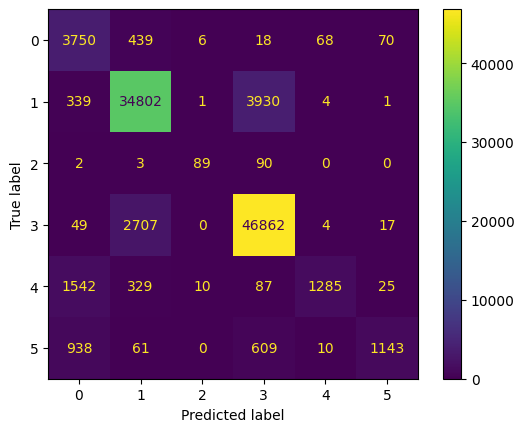

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score

# y_test_arg = np.argmax(y_test, axis=1)
y_test_arg = y_test
conf_matrix = confusion_matrix(y_test_arg, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
accuracy = accuracy_score(y_test_arg, y_hat)
precision_macro = precision_score(y_test_arg, y_hat, average='macro')
precision_micro = precision_score(y_test_arg, y_hat, average='micro')
precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
f1_macro = f1_score(y_test_arg, y_hat, average='macro')
f1_micro = f1_score(y_test_arg, y_hat, average='micro')
# auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Accuracy: {accuracy}")
print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
# print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "dnn",
    "Accuracy": accuracy,
    "Precision-micro": precision_micro,
    "Precision-macro": precision_macro,
    "Precision-weighted": precision_weighted,
    "F1-micro": f1_micro,
    "F1-macro": f1_macro,
    "F1-weighted": f1_weighted,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    # "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/MQTTset/modeldnn.csv", mode='a', index=False)

In [5]:
# import keras_tuner

# # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 100)

# def dnnmodel(hp):
#     model = Sequential([
#         Dense(units=hp.Int("units1", min_value=6, max_value=18, step=6),
#               activation=hp.Choice("activation1", ["sigmoid", "relu", "tanh"]),
#               input_dim=x_train.shape[1]),
#         Dense(units=hp.Int("units2", min_value=6, max_value=18, step=6),
#               activation=hp.Choice("activation2", ["sigmoid", "relu", "tanh"])),
#         Dense(units=hp.Int("units3", min_value=6, max_value=18, step=6),
#               activation=hp.Choice("activation3", ["sigmoid", "relu", "tanh"])),
#         Dense(units=hp.Int("units4", min_value=6, max_value=18, step=6),
#               activation=hp.Choice("activation4", ["sigmoid", "relu", "tanh"])),
#         Dense(y_train.shape[1], activation=hp.Choice("activation5", ["sigmoid", "relu", "tanh"]))
#     ])
#     learning_rate = hp.Float("lr", min_value=0.01, max_value=0.3, step=0.1)
#     model.compile(optimizer=SGD(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
#     return(model)

# hp = keras_tuner.HyperParameters()

# tuner = keras_tuner.GridSearch(
#     hypermodel=dnnmodel,
#     objective="val_accuracy",
#     max_trials=10,
#     seed=15,
#     executions_per_trial=5,
#     #hyperparameters=None,
#     tune_new_entries=True,
#     allow_new_entries=True,
#     #max_retries_per_trial=0,
#     max_consecutive_failed_trials=3
# )

# tuner.search(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

# tuner.search_space_summary()

# tuner.results_summary()

# models = tuner.get_best_models(num_models=1)
# print(models[0].summary())